In [1]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import random 
#!pip install import-ipynb
#import import_ipynb
import modelparameters as mpar
import numpy as np
from sympy import *
import time


T 108.33078115826872


1.5070016255625132
Время выполнения: 275.0795121192932
Среднее время выполнения одного эксперимента: 2.7507951211929322


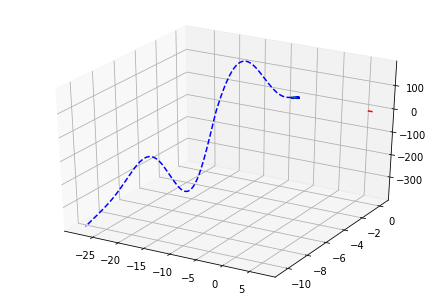

In [2]:

def length2(R,r):
    return (R[0] - r[0]) ** 2 + (R[1] - r[1]) ** 2 + (R[2] - r[2]) ** 2

def f_e(i, R_1, R_2, r):
        return (R_1[i] - r[i]) / (
                (length2(R_1,r) + mpar.aep ** 2) ** (3 / 2)) + (
                (R_2[i] - r[i])) /  (
                (length2(R_2,r) + mpar.aep ** 2) ** (3 / 2))


def f_p1(i,R_1, R_2, r) :
        return (-(R_1[i] - r[i]) / (
                (length2(R_1,r) + mpar.aep ** 2) ** (3 / 2)) + (R_1[i] - R_2[i]) / ((length2(R_1,R_2) + mpar.app ** 2) ** (3 / 2)))

def f_p2(i, R_1, R_2, r) :
        return (-(R_2[i] - r[i]) / (
                (length2(R_2,r) + mpar.aep ** 2) ** (3 / 2)) - (R_1[i] - R_2[i]) / ((length2(R_1,R_2) + mpar.app ** 2) ** (3 / 2)))

p = mpar.p
R_1 = [-mpar.dist/2, 0, 0] #начальные положения pr1,pr2,e
R_2 = [mpar.dist/2, 0, 0]
r = [0,0,0]
def dif(a, t) :
    x, y, z, x_1, y_1, z_1, x_2, y_2, z_2, px, py, pz, p_1x, p_1y, p_1z, p_2x, p_2y, p_2z = a
    dadt = [px, py, pz,
            p_1x / mpar.m_p, p_1y / mpar.m_p, p_1z / mpar.m_p,
            p_2x / mpar.m_p, p_2y / mpar.m_p, p_2z / mpar.m_p,
            f_e(0,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_e(1,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_e(2,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p1(0,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p1(1,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p1(2,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p2(0,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p2(1,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p2(2,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z])]
    return dadt
print (mpar.dist)
start = time.time()
def a_0(i):
    a_0 = [0, 0, 0, -mpar.dist / 2, 0, 0, mpar.dist / 2, 0, 0, p[i][0], p[i][1], p[i][2], 0, 0, 0, 0, 0, 0]
    return a_0
solution = []
#Решения 18 уравнений для n экспериментов
for i in range (mpar.nn):
    solution.append(odeint(dif, a_0(i), mpar.t))
#print ("rfn", solution[1][mpar.L -1,3])




#Решаем сиситему 18 диф. уравнений с лазером
#t = linspace(u, u+T,10000)

def E(t):
    E = mpar.E_0 * (np.sin(np.pi * t / mpar.T)) ** 2 * np.sin(mpar.w_0 * t)
    return E

t2 = linspace(mpar.u, mpar.u + 325, 100000)
def dif2(a, t2):
    x, y, z, x_1, y_1, z_1, x_2, y_2, z_2, px, py, pz, p_1x, p_1y, p_1z, p_2x, p_2y, p_2z = a
    L = 100000
    dadt  = [px, py, pz,
            p_1x / mpar.m_p, p_1y / mpar.m_p, p_1z / mpar.m_p,
            p_2x / mpar.m_p, p_2y / mpar.m_p, p_2z / mpar.m_p,
            f_e(0,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_e(1,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_e(2,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]) - E(t2),#-E(t - 300*mpar.T)
            f_p1(0,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p1(1,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p1(2,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]) + E(t2), #E(t - 300*mpar.T)
            f_p2(0,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p2(1,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]),
            f_p2(2,[x_1, y_1, z_1],[x_2, y_2, z_2],[x, y, z]) + E(t2)] #E(t - 300*mpar.T)
    return dadt


def a_00(i):
    a_00 = [solution[i][mpar.L - 1, 0], solution[i][mpar.L - 1, 1], solution[i][mpar.L - 1, 2], solution[i][mpar.L - 1, 3], solution[i][mpar.L - 1, 4], solution[i][mpar.L - 1, 5], solution[i][mpar.L - 1, 6], solution[i][mpar.L - 1, 7], solution[i][mpar.L - 1, 8], solution[i][mpar.L - 1, 9], solution[i][mpar.L - 1, 10], solution[i][mpar.L - 1, 11], solution[i][mpar.L - 1, 12], solution[i][mpar.L - 1, 13], solution[i][mpar.L - 1, 14], solution[i][mpar.L - 1, 15], solution[i][mpar.L - 1, 16], solution[i][mpar.L - 1, 17]]
    return a_00
solution2 = []

#print(solution[0][:, 0], solution[0][mpar.L-1, 0])

# Решения 18 уравнений для n экспериментов
for i in range(mpar.nn):
    solution2.append(odeint(dif2, a_00(i), t2))
end = time.time()
vt = end-start
print('Время выполнения:',vt)
print('Среднее время выполнения одного эксперимента:',vt/mpar.nn)
fig = plt.figure()
ax = Axes3D(fig)
y = solution2[0][:, 1]
x = solution2[0][:, 0]
z = solution2[0][:, 2]
y_1 = solution2[0][:, 4]
x_1 = solution2[0][:, 3]
z_1 = solution2[0][:, 5]
y_2 = solution2[0][:, 7]
x_2 = solution2[0][:, 6]
z_2 = solution2[0][:, 8]
ax.plot(x,y,z,'--b')
ax.plot(x_1, y_1, z_1,'g-')
ax.plot(x_2, y_2, z_2,'r')
plt.show()


In [ ]:
%matplotlib qt
plt.plot(mpar.t, solution[0][:, 0], '-b', marker='o', label='x_e(t)')
plt.plot(mpar.t, solution[0][:, 3], 'g', label='x_1(t)')
plt.plot(mpar.t, solution[0][:, 6], 'r', label='x_2(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
y = solution2[0][:, 1]
x = solution2[0][:, 0]
z = solution2[0][:, 2]
y_1 = solution2[0][:, 4]
x_1 = solution2[0][:, 3]
z_1 = solution2[0][:, 5]
y_2 = solution2[0][:, 7]
x_2 = solution2[0][:, 6]
z_2 = solution2[0][:, 8]
ax.plot(x,y,z,'--b')
ax.plot(x_1, y_1, z_1,'g-')
ax.plot(x_2, y_2, z_2,'r')
plt.show()

In [ ]:
%matplotlib qt
fig = plt.figure()
ax = Axes3D(fig)
y = solution[0][:, 1]
x = solution[0][:, 0]
z = solution[0][:, 2]
y_1 = solution[0][:, 4]
x_1 = solution[0][:, 3]
z_1 = solution[0][:, 5]
y_2 = solution[0][:, 7]
x_2 = solution[0][:, 6]
z_2 = solution[0][:, 8]
ax.plot(x,y,z,'--b')
ax.plot(x_1, y_1, z_1,'g-')
ax.plot(x_2, y_2, z_2,'r')
plt.show()